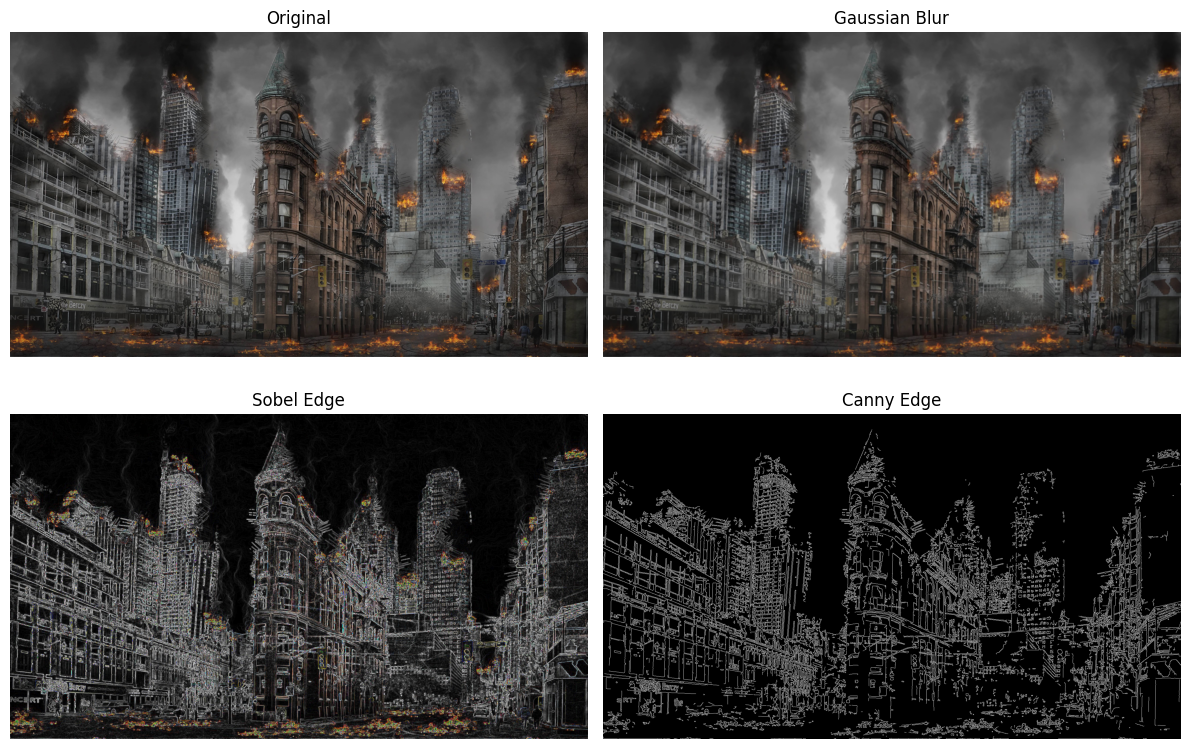

In [9]:

image_path = '/home/a/Desktop/Building system using ChatGPT API/wallpaperflare.com_wallpaper (1).jpg'
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
color_image = cv2.imread(image_path)

if color_image is None:
    print("Error: Image not loaded or invalid path.")
else:
    # Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(color_image, (5, 5), 0)

    # Sobel Edge Detection
    sobel_x = cv2.Sobel(color_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(color_image, cv2.CV_64F, 0, 1, ksize=3)
    edge_sobel = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

    # Canny Edge Detection
    edge_canny = cv2.Canny(color_image, threshold1=100, threshold2=200)

    # Display results
    images = [color_image, gaussian_blur, edge_sobel, edge_canny]
    titles = ['Original', 'Gaussian Blur', 'Sobel Edge', 'Canny Edge']

    plt.figure(figsize=(12, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 2, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


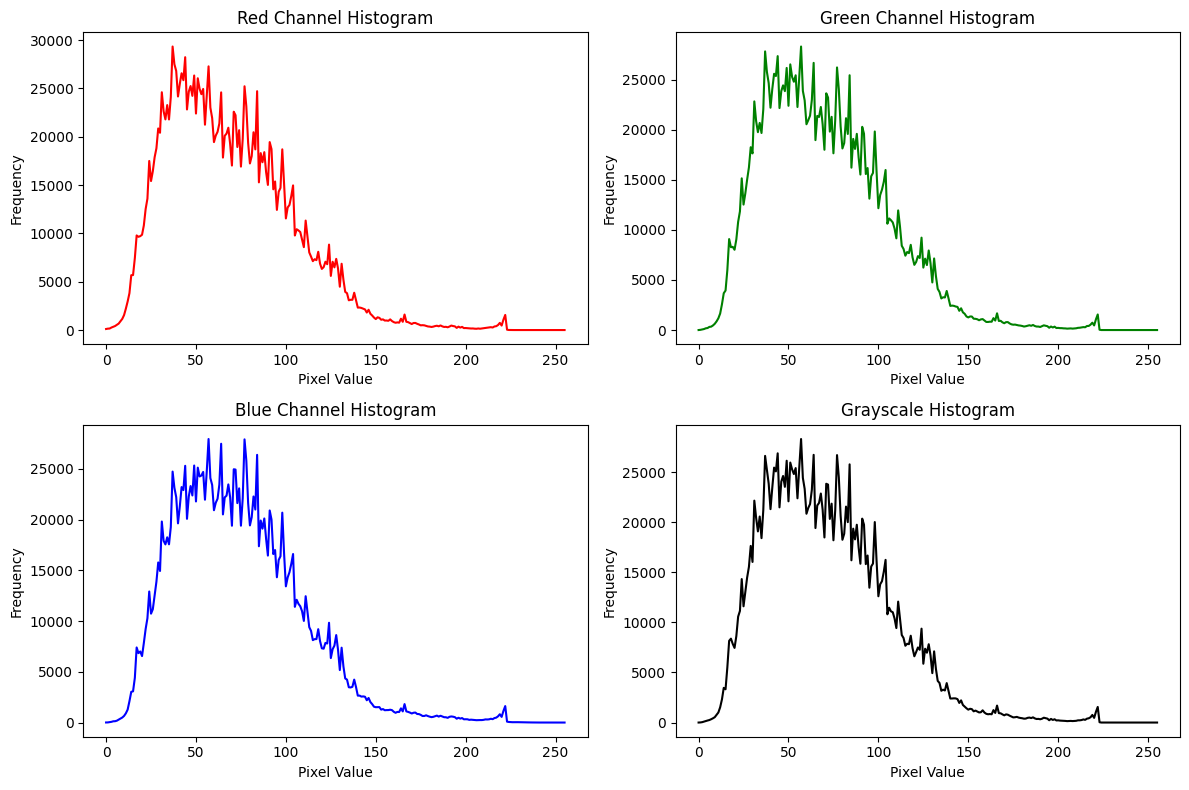

In [11]:
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Calculate histograms for RGB channels and grayscale
    hist_red = cv2.calcHist([color_image], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([color_image], [1], None, [256], [0, 256])
    hist_blue = cv2.calcHist([color_image], [2], None, [256], [0, 256])
    hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Display pixel frequency histograms
    plt.figure(figsize=(12, 8))

    # RGB histograms
    plt.subplot(2, 2, 1)
    plt.plot(hist_red, color='red')
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    plt.plot(hist_green, color='green')
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    plt.plot(hist_blue, color='blue')
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Grayscale histogram
    plt.subplot(2, 2, 4)
    plt.plot(hist_gray, color='black')
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

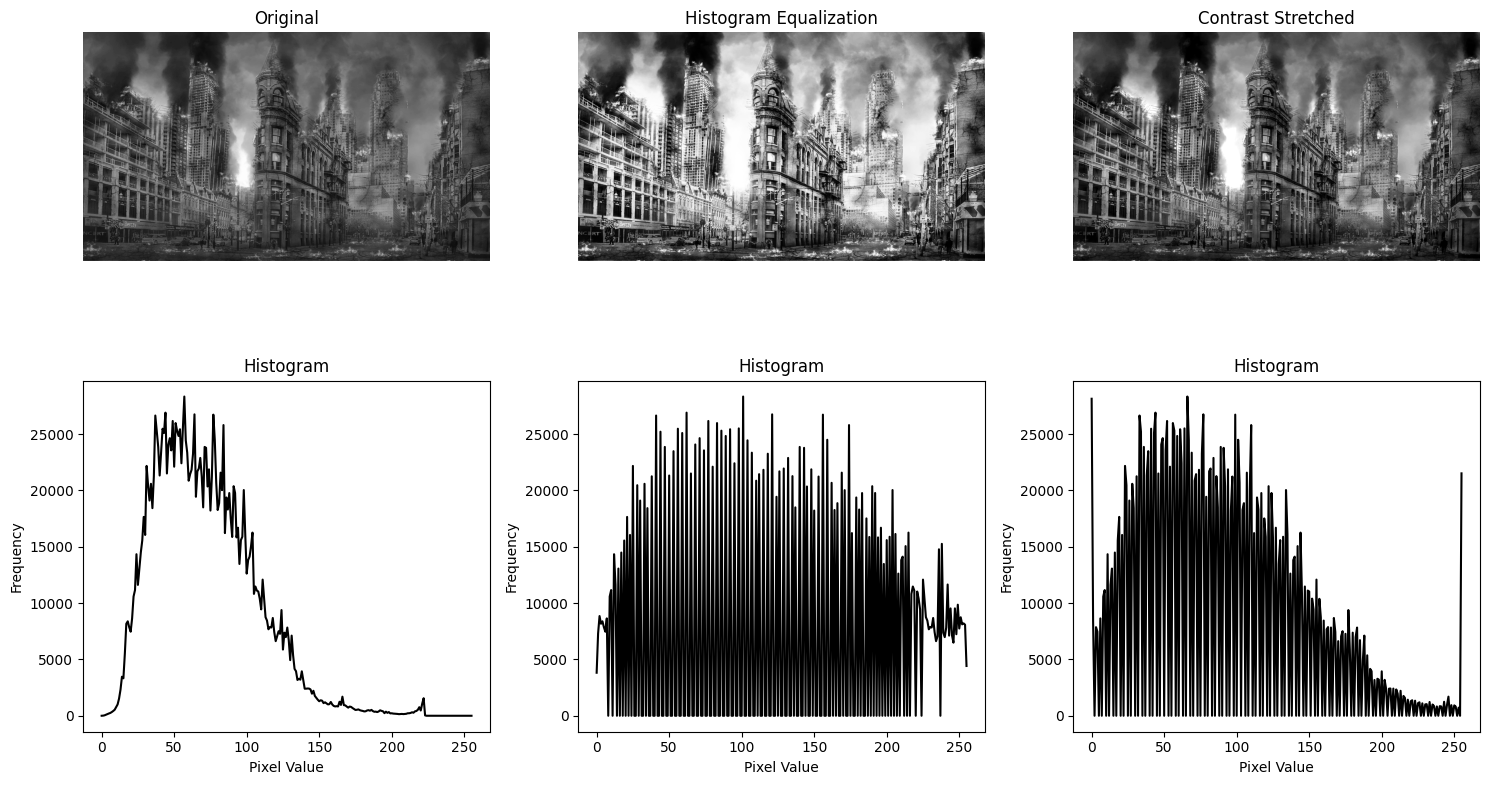

In [21]:
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Create separate grayscale copies for each technique
gray_original = gray_image.copy()
gray_hist_equalized = gray_image.copy()
gray_contrast_stretched = gray_image.copy()

# Histogram Equalization
gray_hist_equalized = cv2.equalizeHist(gray_hist_equalized)

# Contrast Stretching
p1, p99 = np.percentile(gray_contrast_stretched, (1, 99))
gray_contrast_stretched = np.clip((gray_contrast_stretched - p1) / (p99 - p1) * 255, 0, 255).astype(np.uint8)

# Display images and histograms
plt.figure(figsize=(15, 12))

techniques = [
('Original', gray_original),
('Histogram Equalization', gray_hist_equalized),
('Contrast Stretched', gray_contrast_stretched)
]

for i, (title, img) in enumerate(techniques, start=1):
    plt.subplot(3, len(techniques), i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(3, len(techniques), len(techniques) + i)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()